<a href="https://colab.research.google.com/github/sararayhane/Face-Recognition/blob/main/FACE_RECOGNATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


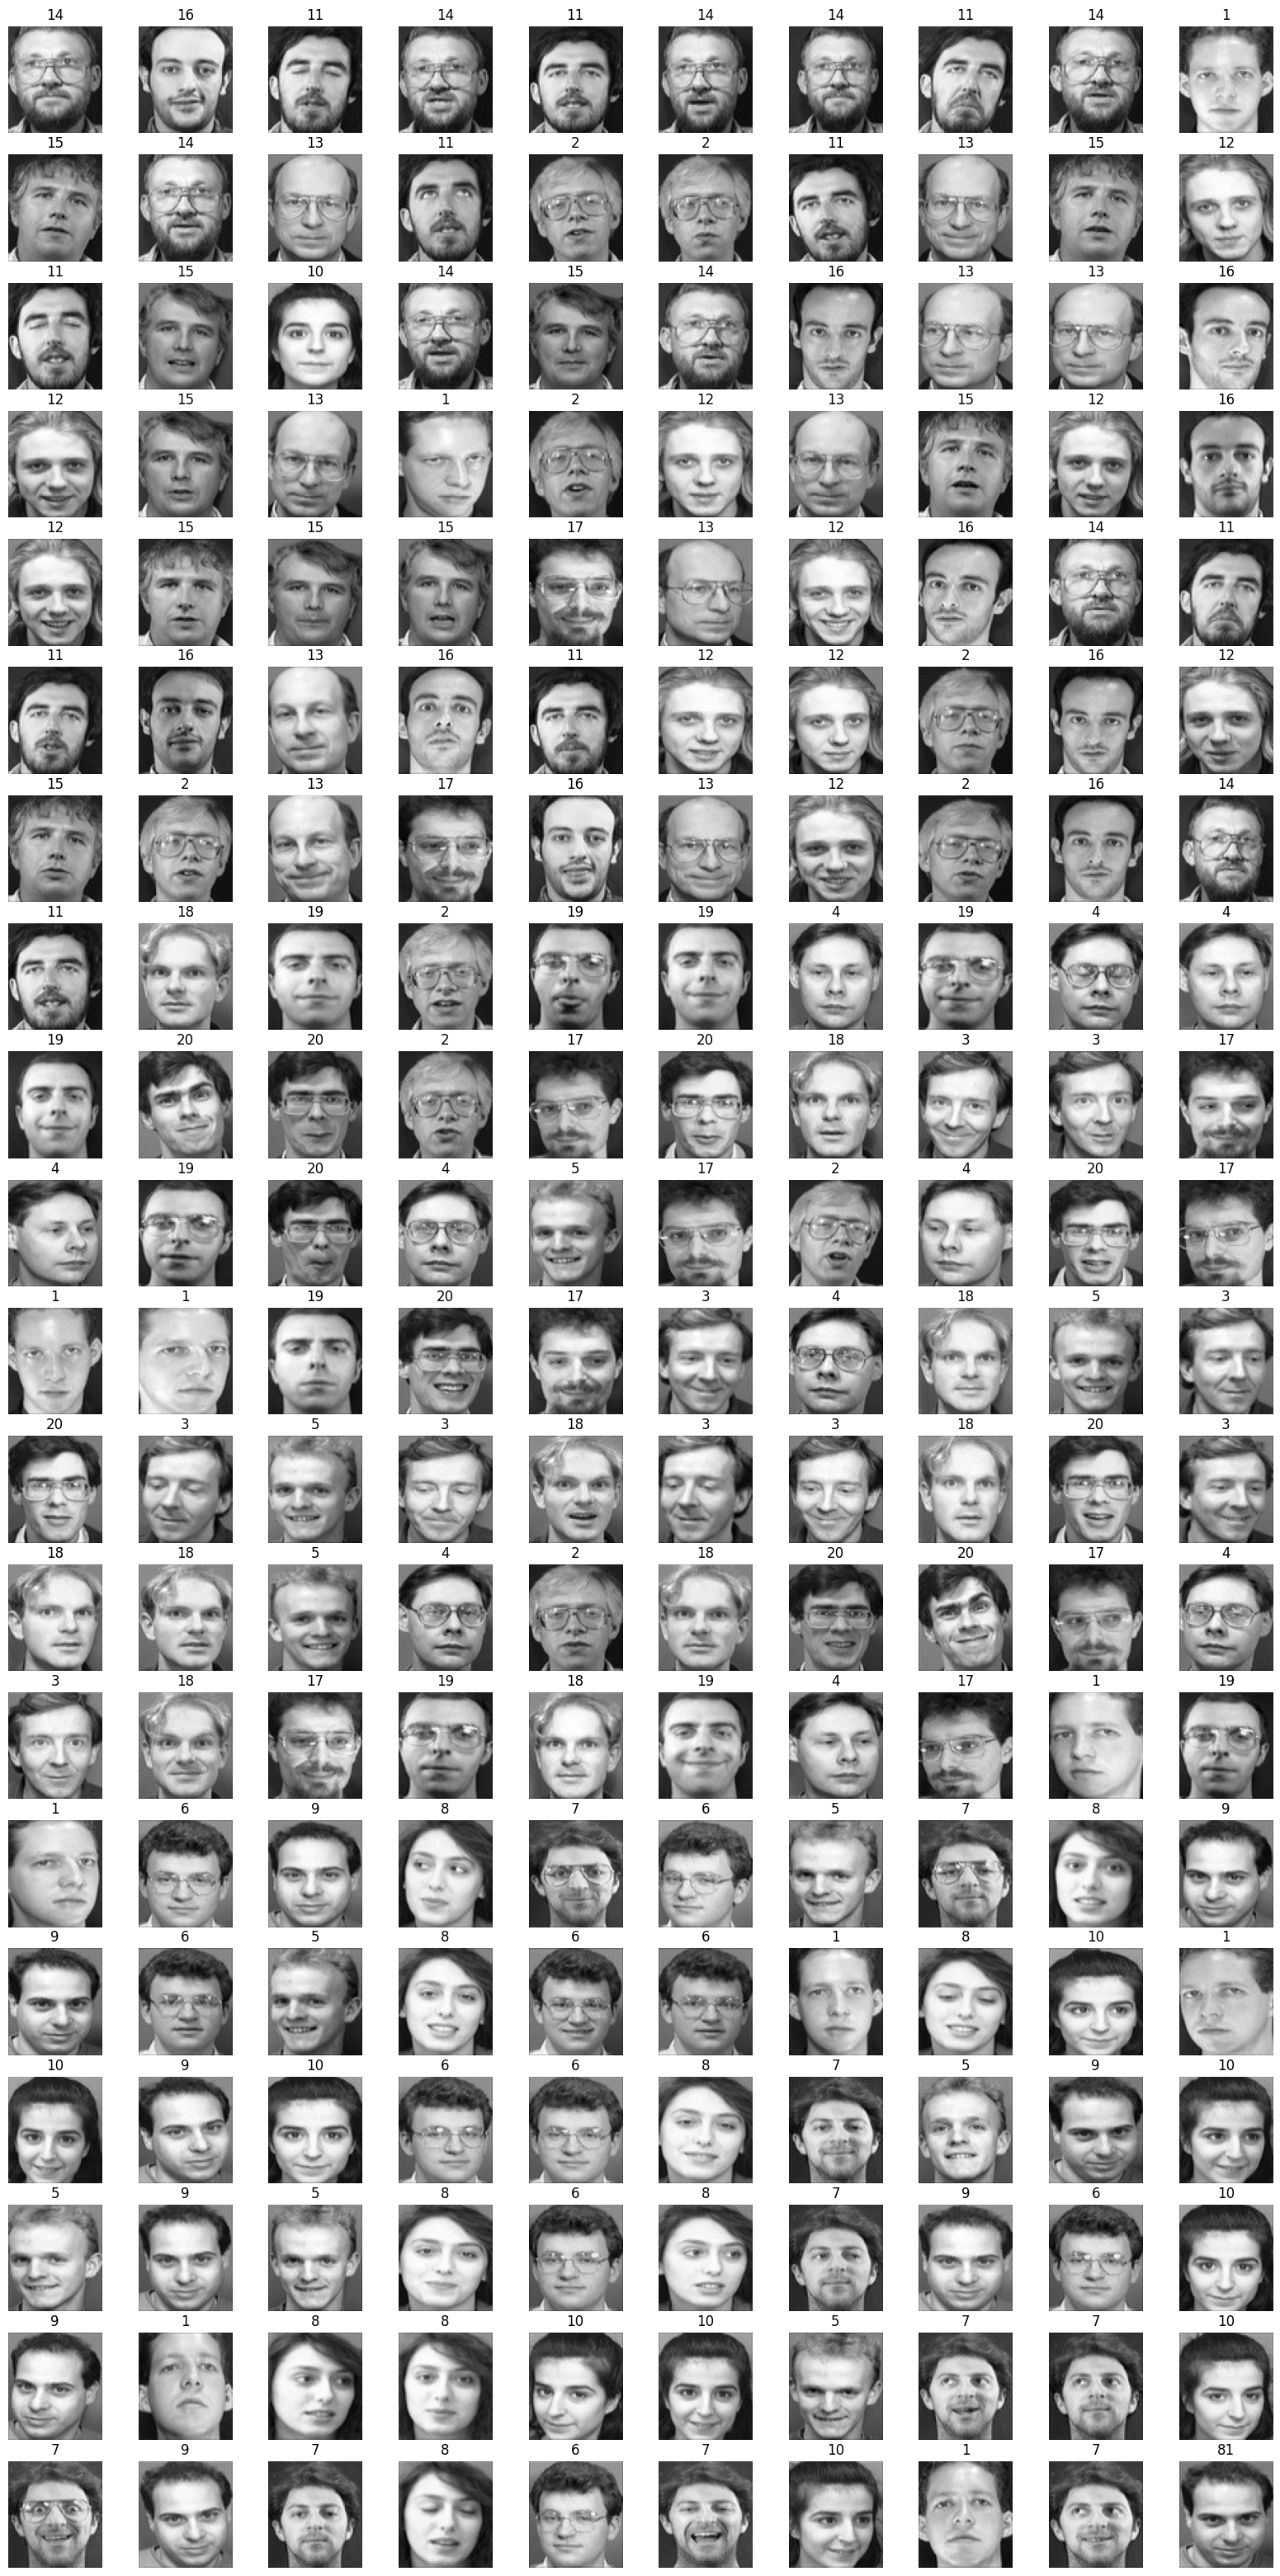

In [12]:
import cv2
import glob
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

dir_path = "/content/drive/MyDrive/datasets/ORL_20 subjects (1)/ORL_20 subjects"
fig, axs = plt.subplots(nrows=20, ncols=10, figsize=(20, 40))
axs = axs.flatten()
labels = []
for i, filename in enumerate(os.listdir(dir_path)):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(dir_path, filename)
        l = os.path.split(img_path)
        l = (l[1].split('.'))
        l = (l[0].split('_'))
        labels.append(l[1])
        img = mpimg.imread(img_path)
        axs[i].imshow(img,cmap= "gray")
        axs[i].axis('off')
        axs[i].set_title(l[1])

In [13]:
import os
import pandas as pd
import cv2

dir_path = "/content/drive/MyDrive/datasets/ORL_20 subjects (1)/ORL_20 subjects"

data = []
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        img_path = os.path.join(dir_path, filename)
        label = filename.split('_')[-1].split('.')[0]
        img = cv2.imread(img_path)
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append([label, img])




In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import os
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file ="/content/drive/MyDrive/datasets/ORL_20 subjects (1)/ORL_20 subjects/*.jpg"
glob.glob(file)

In [15]:
len(labels)
len(img)
images = [cv2.imread(image ) for image in glob.glob(file)]

In [34]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, train_size = 0.8)

In [17]:
len(X_train)

160

In [18]:
len(y_test)

40

In [19]:
len(labels)

200

##HOG to extract image features:

<ipython-input-20-cb8067d9fe12>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(X_train[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)


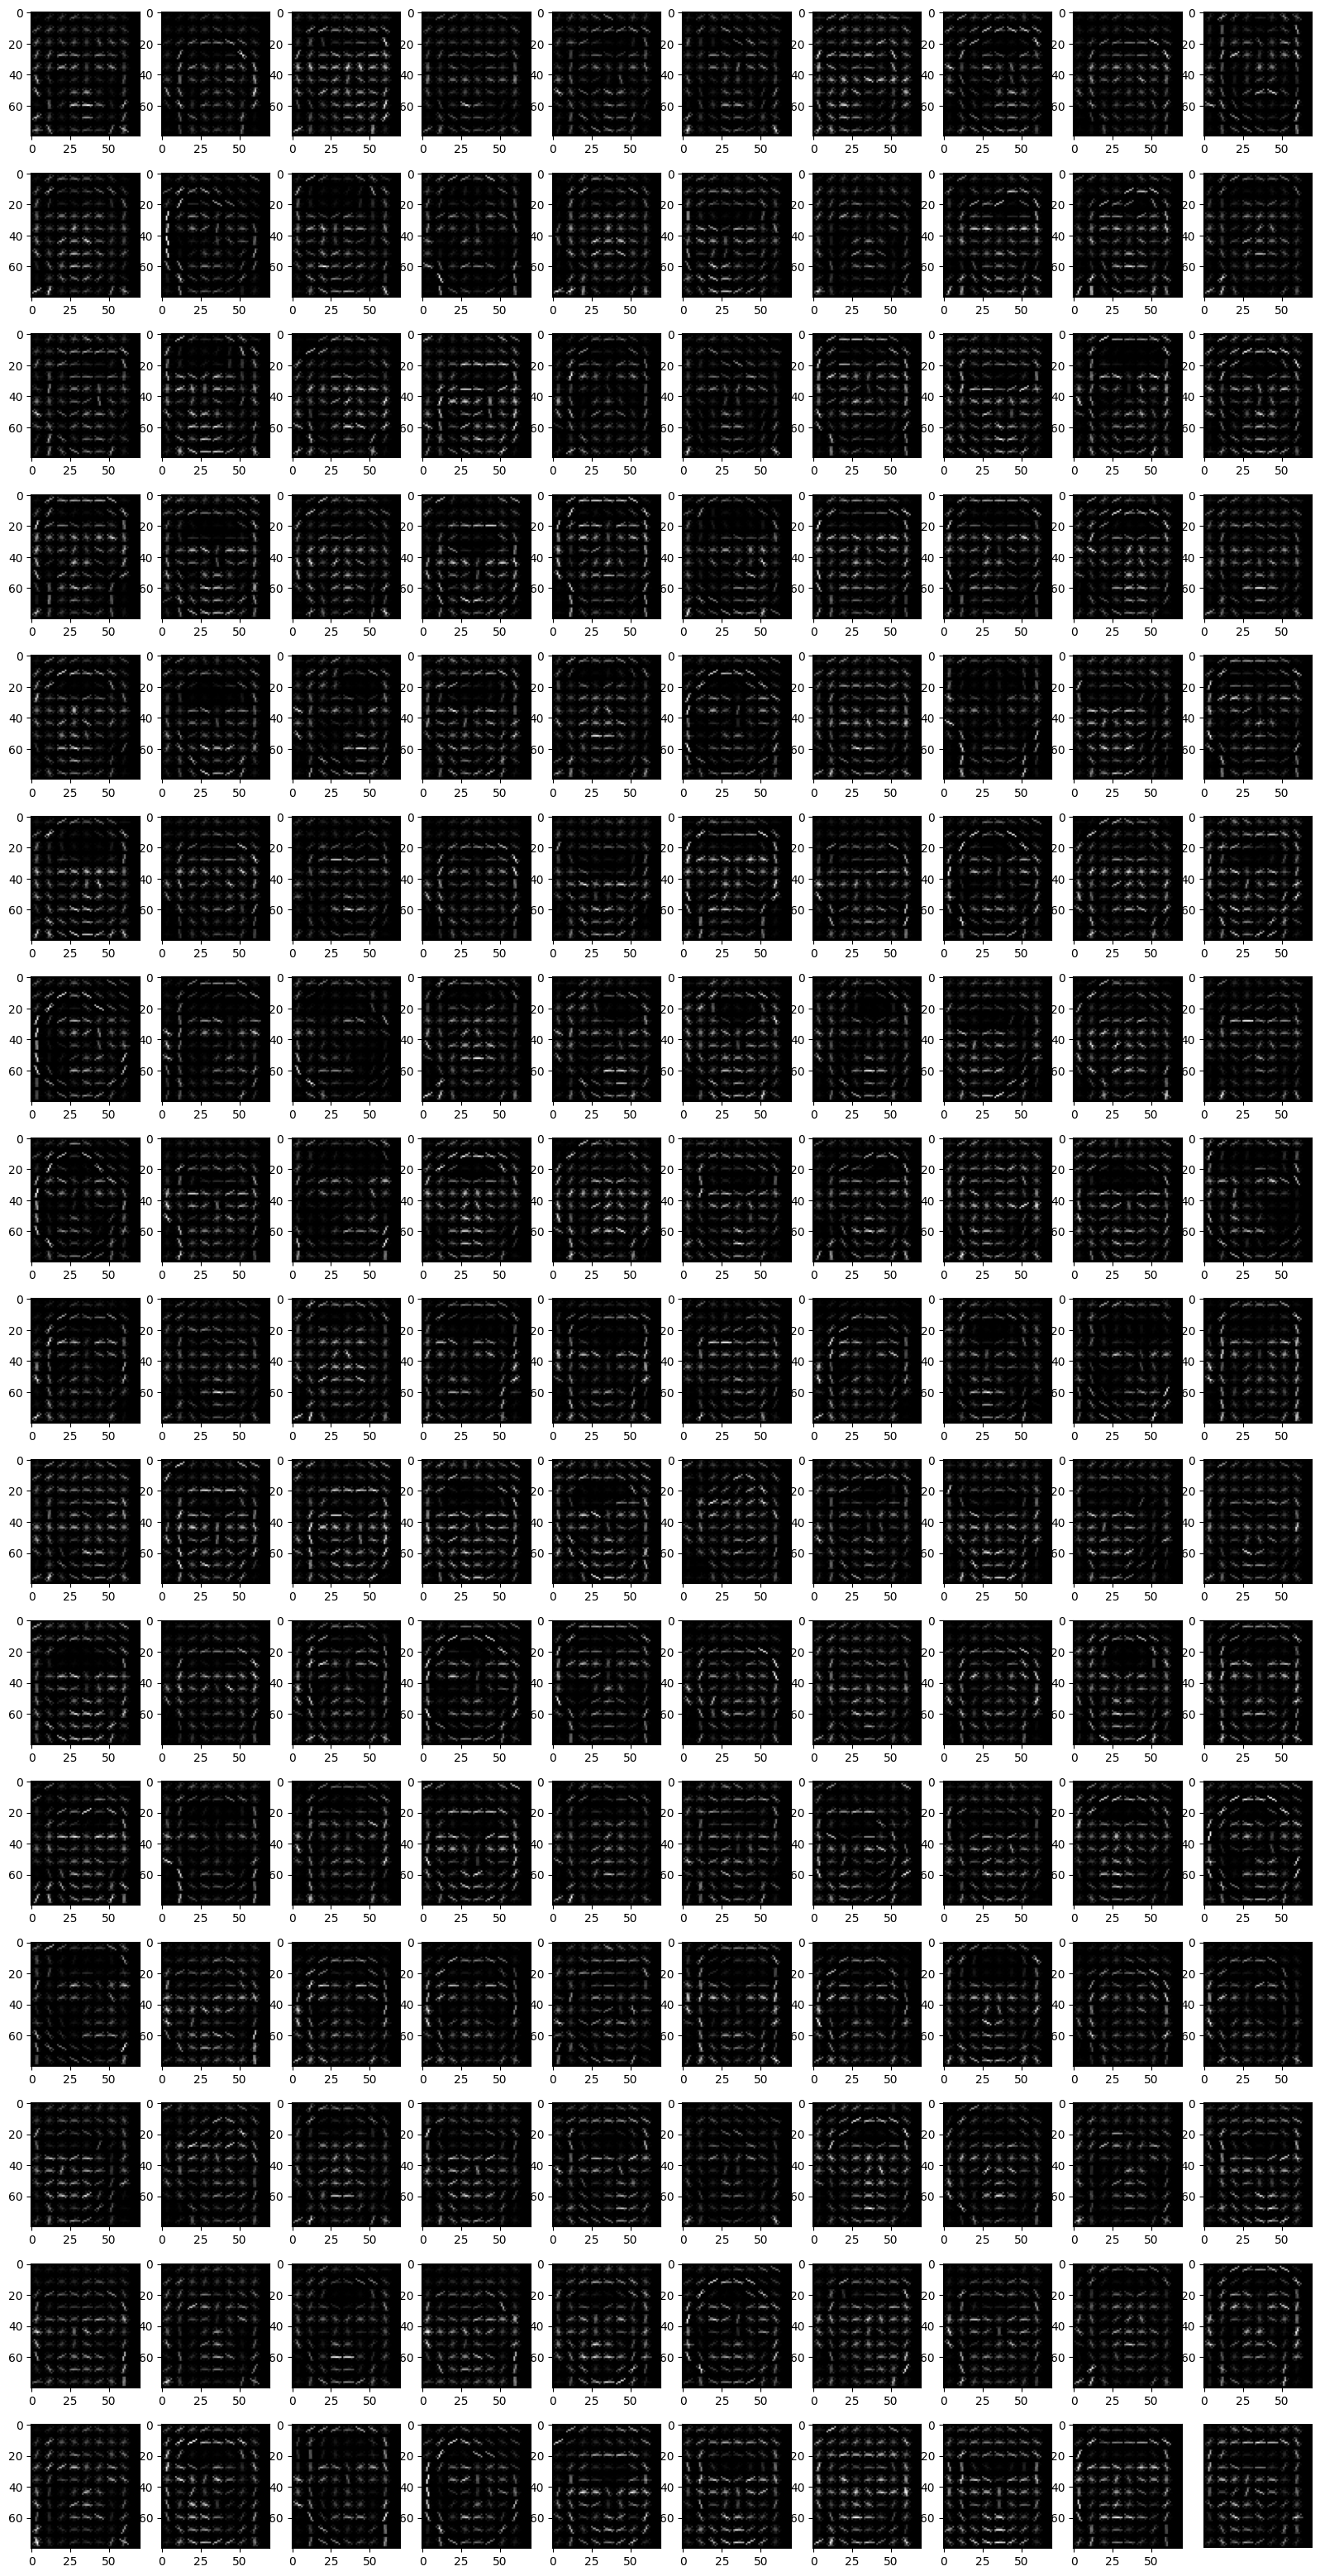

In [20]:
fig, axs = plt.subplots(nrows=16, ncols=10, figsize=(20, 40))
axs = axs.flatten()
for i in range(len(X_train)):
    # ax = plt.subplot(10,8,i+1)
    plt.xticks([])
    plt.yticks([])
    fd, hog_image = hog(X_train[i], orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=True)
    plt.axis("off")
    axs[i].imshow(hog_image, cmap="gray")

<ipython-input-21-db51bd9dbc76>:15: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),


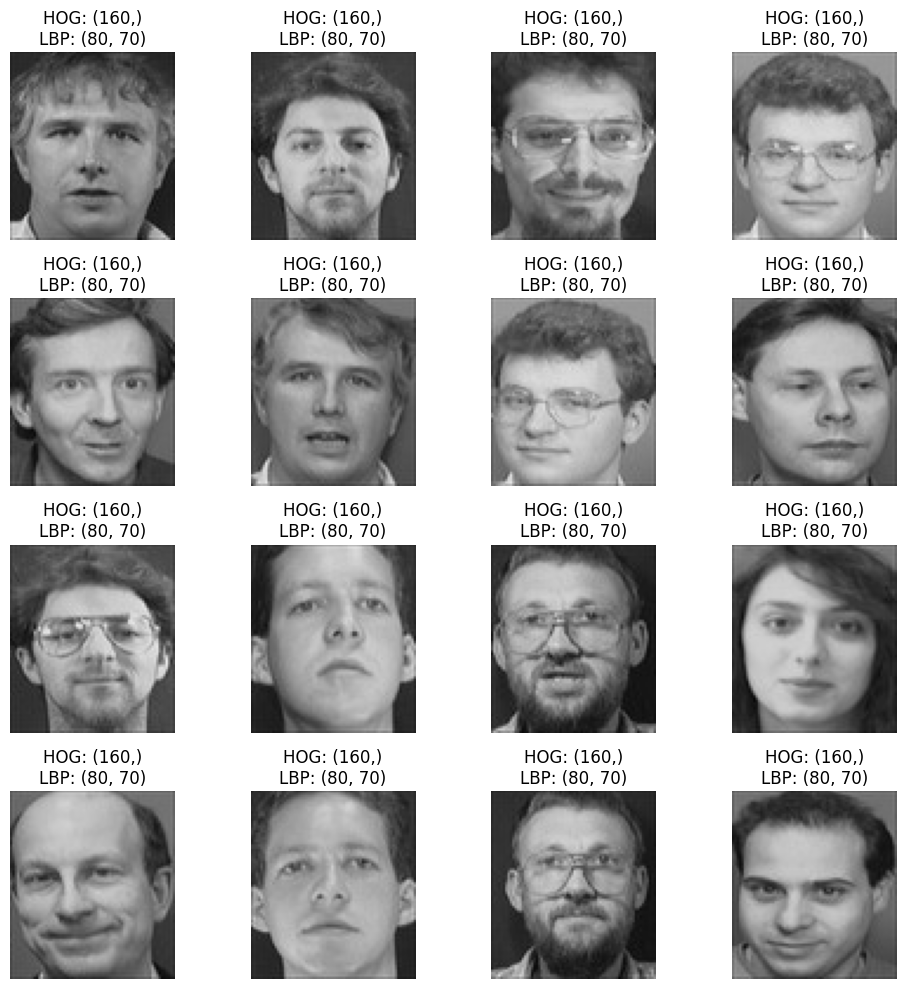

In [21]:
# Import required libraries
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray

# Create empty lists to store features
hog_features = []
lbp_features = []

# Extract HOG and LBP features for each image in the training set
for image in X_train:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract HOG features
    hog_feature = hog(gray_image, orientations=8, pixels_per_cell=(16, 16),
                      cells_per_block=(1, 1), block_norm='L2-Hys', visualize=False,
                      multichannel=False)
    hog_features.append(hog_feature)

    # Extract LBP features
    lbp_feature = local_binary_pattern(gray_image, P=8, R=3, method='uniform')
    lbp_features.append(lbp_feature)

# Display the result
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axs = axs.flatten()

for i in range(16):
    axs[i].imshow(X_train[i], cmap='gray')
    axs[i].set_title(f'HOG: {hog_features[i].shape}\nLBP: {lbp_features[i].shape}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


## Display of LBP images

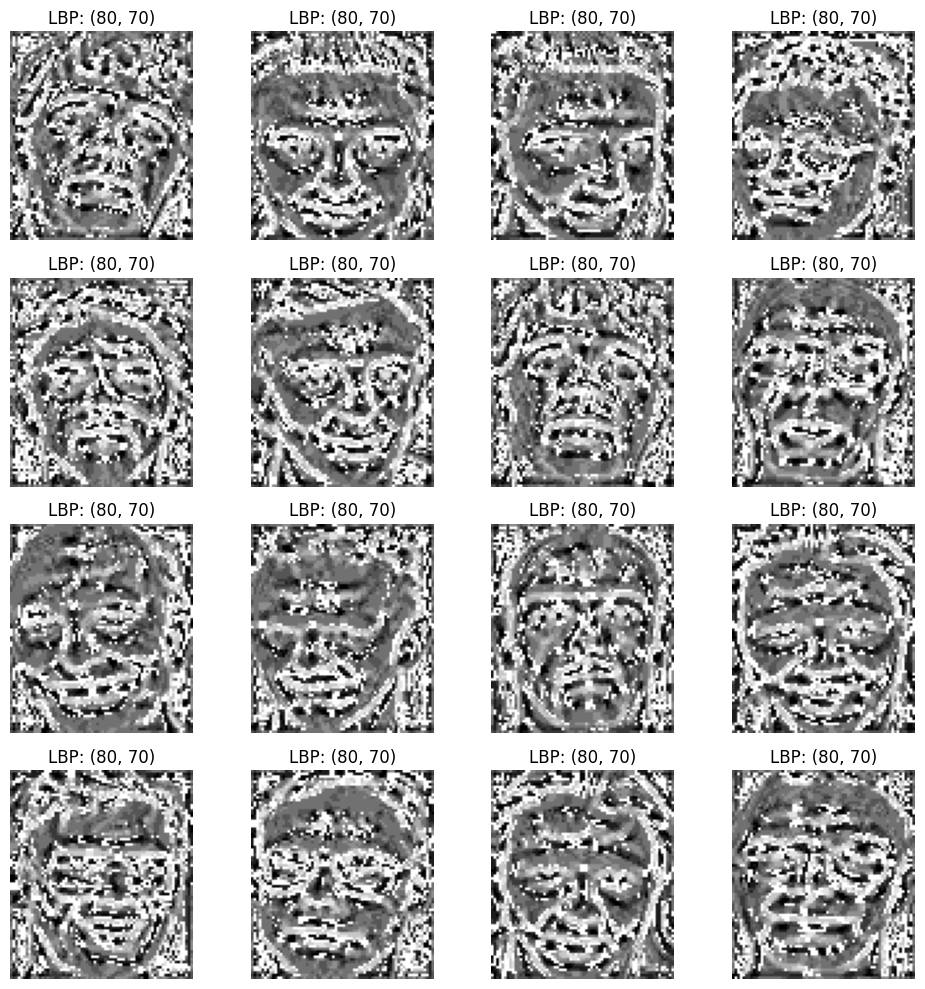

In [35]:
# Import required libraries
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray

# Create empty list to store LBP features
lbp_features = []

# Extract LBP features for each image in the training set
for image in X_train:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract LBP features
    lbp_feature = local_binary_pattern(gray_image, P=8, R=3, method='uniform')
    lbp_features.append(lbp_feature)

# Display the result
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
axs = axs.flatten()

for i in range(16):
    axs[i].imshow(lbp_features[i], cmap='gray')
    axs[i].set_title(f'LBP: {lbp_features[i].shape}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()


##Apply the KNN to classify the images based on the extracted features HOG+KNN:


In [25]:
from skimage.transform import resize

# Create empty list to store resized images
resized_images = []

# Resize each image to (64, 64)
for image in images:
    resized_image = resize(image, (64, 64))
    resized_images.append(resized_image)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, train_size = 0.8)

# Create empty list to store HOG features
hog_features = []

# Extract HOG features for each image in the training set
for image in X_train:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract HOG features
    hog_feature = hog(gray_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_features.append(hog_feature)

# Reshape HOG features for KNN
X_train_hog = np.array(hog_features).reshape(len(hog_features), -1)
y_train_hog = y_train

# Fit KNN model
knn_hog = KNeighborsClassifier(n_neighbors=5)
knn_hog.fit(X_train_hog, y_train_hog)

# Extract HOG features for each image in the test set
hog_features_test = []
for image in X_test:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract HOG features
    hog_feature_test = hog(gray_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_features_test.append(hog_feature_test)

# Reshape HOG features for KNN
X_test_hog = np.array(hog_features_test).reshape(len(hog_features_test), -1)
y_test_hog = y_test

# Predict using KNN model
y_pred_hog = knn_hog.predict(X_test_hog)

# Calculate accuracy score
accuracy_hog_knn = accuracy_score(y_test_hog, y_pred_hog)

print(f'Accuracy score for HOG + KNN: {accuracy_hog_knn}')


Accuracy score for HOG + KNN: 0.975


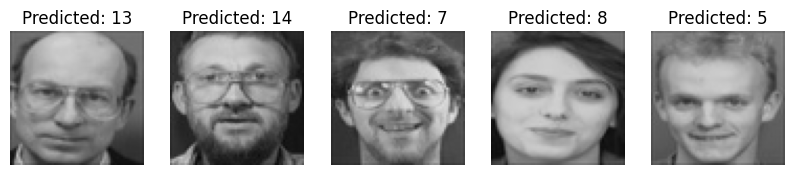

In [30]:
import matplotlib.pyplot as plt

# Display first 5 images and their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i])
    ax.set_title(f'Predicted: {y_pred_hog[i]}')
    ax.axis('off')
plt.show()

##Apply the KNN to classify the images based on the extracted features LBP+KNN

In [36]:
# Import required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape LBP features for KNN
X_train_lbp = np.array(lbp_features).reshape(len(lbp_features), -1)
y_train_lbp = y_train

# Fit KNN model
knn_lbp = KNeighborsClassifier(n_neighbors=5)
knn_lbp.fit(X_train_lbp, y_train_lbp)

# Extract LBP features for each image in the test set
lbp_features_test = []
for image in X_test:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract LBP features
    lbp_feature_test = local_binary_pattern(gray_image, P=8, R=3, method='uniform')
    lbp_features_test.append(lbp_feature_test)

# Reshape LBP features for KNN
X_test_lbp = np.array(lbp_features_test).reshape(len(lbp_features_test), -1)
y_test_lbp = y_test

# Predict using KNN model
y_pred_lbp = knn_lbp.predict(X_test_lbp)

# Calculate accuracy score
accuracy_lbp_knn = accuracy_score(y_test_lbp, y_pred_lbp)

print(f'Accuracy score for LBP + KNN: {accuracy_lbp_knn}')


Accuracy score for LBP + KNN: 0.625


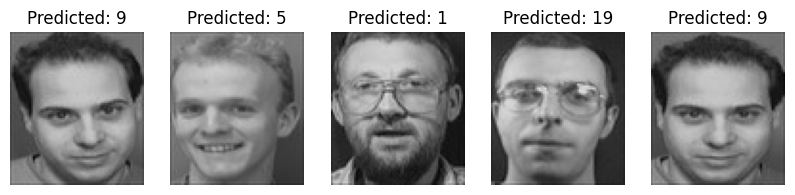

In [37]:
import random
import matplotlib.pyplot as plt

# Select 5 random indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Display the random images and their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[random_indices[i]])
    ax.set_title(f'Predicted: {y_pred_lbp[random_indices[i]]}')
    ax.axis('off')
plt.show()

#LBP+SVM:

Accuracy score for LBP + SVM: 0.7


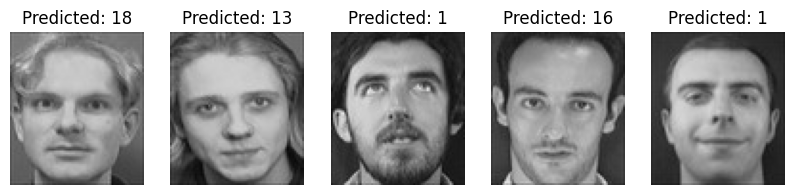

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Reshape LBP features for SVM
X_train_lbp = np.array(lbp_features).reshape(len(lbp_features), -1)
y_train_lbp = y_train

# Fit SVM model
svm_lbp = SVC(kernel='linear')
svm_lbp.fit(X_train_lbp, y_train_lbp)

# Extract LBP features for each image in the test set
lbp_features_test = []
for image in X_test:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract LBP features
    lbp_feature_test = local_binary_pattern(gray_image, P=8, R=3, method='uniform')
    lbp_features_test.append(lbp_feature_test)

# Reshape LBP features for SVM
X_test_lbp = np.array(lbp_features_test).reshape(len(lbp_features_test), -1)
y_test_lbp = y_test

# Predict using SVM model
y_pred_lbp = svm_lbp.predict(X_test_lbp)

# Calculate accuracy score
accuracy_lbp_svm = accuracy_score(y_test_lbp, y_pred_lbp)

print(f'Accuracy score for LBP + SVM: {accuracy_lbp_svm}')

import random
import matplotlib.pyplot as plt

# Select 5 random indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Display the random images and their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[random_indices[i]])
    ax.set_title(f'Predicted: {y_pred_lbp[random_indices[i]]}')
    ax.axis('off')
plt.show()


#HOG+SVM

Accuracy score for HOG + SVM: 0.975


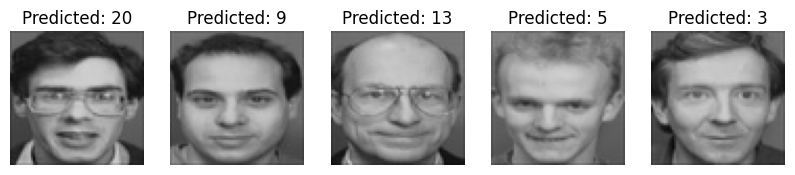

In [39]:
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import random

# Load dataset and labels

# Create empty list to store resized images
resized_images = []

# Resize each image to (64, 64)
for image in images:
    resized_image = resize(image, (64, 64))
    resized_images.append(resized_image)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, train_size=0.8)

# Create empty list to store HOG features
hog_features = []

# Extract HOG features for each image in the training set
for image in X_train:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract HOG features
    hog_feature = hog(gray_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_features.append(hog_feature)

# Reshape HOG features for SVM
X_train_hog = np.array(hog_features)
y_train_hog = y_train

# Fit SVM model
svm_hog = SVC(kernel='linear')
svm_hog.fit(X_train_hog, y_train_hog)

# Extract HOG features for each image in the test set
hog_features_test = []
for image in X_test:
    # Convert the image to grayscale
    gray_image = rgb2gray(image)

    # Extract HOG features
    hog_feature_test = hog(gray_image, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
    hog_features_test.append(hog_feature_test)

# Reshape HOG features for SVM
X_test_hog = np.array(hog_features_test)
y_test_hog = y_test

# Predict using SVM model
y_pred_hog = svm_hog.predict(X_test_hog)

# Calculate accuracy score
accuracy_hog_svm = accuracy_score(y_test_hog, y_pred_hog)

print(f'Accuracy score for HOG + SVM: {accuracy_hog_svm}')

# Select 5 random indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Display the random images and their predicted labels
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes):
    ax.imshow(X_test[random_indices[i]])
    ax.set_title(f'Predicted: {y_pred_hog[random_indices[i]]}')
    ax.axis('off')
plt.show()


##CONFUSIN MATRIX

In [40]:
from sklearn.metrics import confusion_matrix

# Fit SVM model
svm_hog = SVC(kernel='linear')
svm_hog.fit(X_train_hog, y_train_hog)

# Predict using SVM model
y_pred_hog_svm = svm_hog.predict(X_test_hog)

# Display confusion matrix
cm_hog_svm = confusion_matrix(y_test_hog, y_pred_hog_svm)
print(f'Confusion matrix for HOG + SVM:\n{cm_hog_svm}')

Confusion matrix for HOG + SVM:
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


In [41]:

# Display confusion matrix
cm_hog_svm = confusion_matrix(y_test_hog, y_pred_hog )
print(f'Confusion matrix for HOG + SVM:\n{cm_hog_svm}')

Confusion matrix for HOG + SVM:
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]]


#HEATMAP

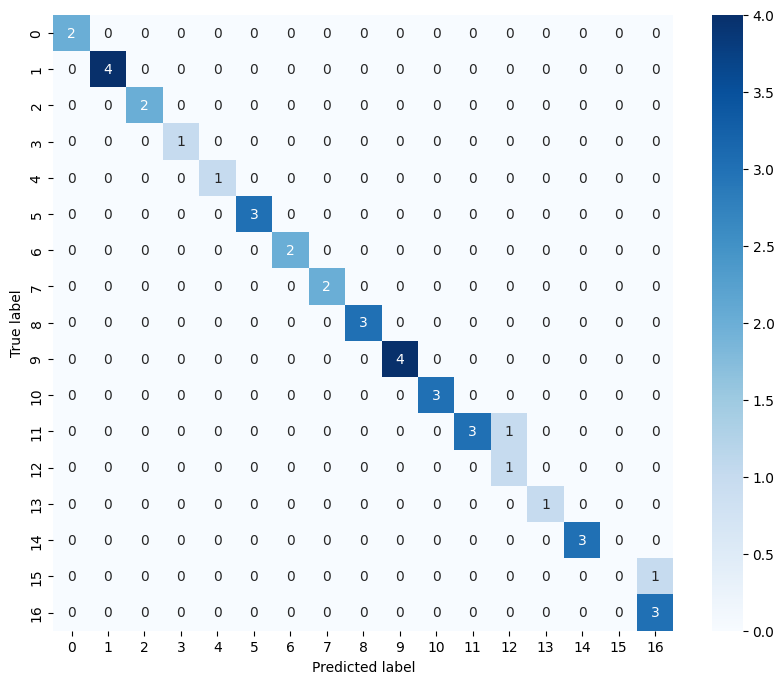

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict using KNN model
y_pred_hog = knn_hog.predict(X_test_hog)

# Calculate confusion matrix
cm_hog_knn = confusion_matrix(y_test_hog, y_pred_hog)

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm_hog_knn, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
